# Data visualization tools

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collect import Data
from scipy.optimize import curve_fit
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

In [173]:
database = Data('../Data/measurements.nc', '../Data/nwp.nc')
df = pd.DataFrame(
    data = database.data,
    columns=[
        'ghi',
        'ghi_nwp',
        'T',
        'T_nwp',
        'ws',
        'ws_nwp',
        'wd',
        'wd_nwp',
        'kc',
        'kc_nwp',
        'wx',
        'wx_nwp',
        'wy',
        'wy_nwp',
        'cs'
    ]
)
df

,ghi,ghi_nwp,T,T_nwp,ws,ws_nwp,wd,wd_nwp,kc,kc_nwp,wx,wx_nwp,wy,wy_nwp,cs
0,0.0,0.00000,289.35,289.840730,7.0,7.753966,220.0,237.109060,0.000000,0.000000,-5.362311,-4.210727,-4.499513,-6.511050,0.0
1,0.0,0.00000,289.35,289.785228,6.2,7.650345,230.0,232.918395,0.000000,0.000000,-3.985283,-4.612790,-4.749476,-6.103274,0.0
2,0.0,0.00000,289.25,289.708639,5.8,6.704539,230.0,239.042369,0.000000,0.000000,-3.728168,-3.448842,-4.443058,-5.749463,0.0
3,0.0,0.00000,289.15,289.653621,5.2,5.817804,240.0,252.273447,0.000000,0.000000,-2.600000,-1.771373,-4.503332,-5.541578,0.0
4,4.0,8.54034,289.05,289.603451,4.3,4.577616,240.0,257.848185,0.363636,0.776395,-2.150000,-0.963601,-3.723909,-4.475047,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14683,0.0,0.00000,295.15,295.807986,1.7,8.216769,330.0,50.754985,0.000000,0.000000,1.472243,5.198240,-0.850000,6.363458,0.0
14684,0.0,0.00000,295.25,295.764489,2.6,9.031181,330.0,45.740712,0.000000,0.000000,2.251666,6.302921,-1.300000,6.468031,0.0
14685,0.0,0.00000,295.35,295.581034,2.5,9.235310,330.0,44.719185,0.000000,0.000000,2.165064,6.562278,-1.250000,6.498266,0.0
14686,0.0,0.00000,295.35,295.326192,2.4,9.489244,340.0,48.525199,0.000000,0.000000,2.255262,6.284637,-0.820848,7.109788,0.0


In [128]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300, init='pca')
tsne_results = tsne.fit_transform(np.array(df[['ghi', 'ws', 'T', 'wd']]))

/Users/david/miniconda3/envs/datasophia/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 14688 samples in 0.006s...
[t-SNE] Computed neighbors for 14688 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14688
[t-SNE] Computed conditional probabilities for sample 2000 / 14688
[t-SNE] Computed conditional probabilities for sample 3000 / 14688
[t-SNE] Computed conditional probabilities for sample 4000 / 14688
[t-SNE] Computed conditional probabilities for sample 5000 / 14688
[t-SNE] Computed conditional probabilities for sample 6000 / 14688
[t-SNE] Computed conditional probabilities for sample 7000 / 14688
[t-SNE] Computed conditional probabilities for sample 8000 / 14688
[t-SNE] Computed conditional probabilities for sample 9000 / 14688
[t-SNE] Computed conditional probabilities for sample 10000 / 14688
[t-SNE] Computed conditional probabilities for sample 11000 / 14688
[t-SNE] Computed conditional probabilities for sample 12000 / 14688
[t-SNE] Computed conditional probabilities for sam

/Users/david/miniconda3/envs/datasophia/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.496632
[t-SNE] KL divergence after 300 iterations: 1.148510


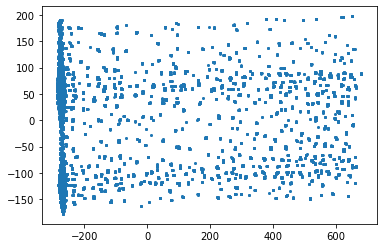

In [130]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=3)

In [205]:
pca = PCA(n_components=2, svd_solver='full')
Y = df[['ghi', 'T', 'wx', 'wy']]
X = (Y - Y.mean(axis=0))/Y.std(axis=0)
X_new = pca.fit_transform(X)
cov = pca.get_covariance()
val, vec = np.linalg.eig(cov)
print(pca.explained_variance_ratio_)
print(vec[:, 1])

[0.41127846 0.2656737 ]
[0.01229775 0.07065013 0.703835   0.70673447]


In [206]:
# Reconstruction RMSE on each feature

np.sqrt(np.power(X - pca.inverse_transform(X_new), 2).mean(axis=0))

ghi    0.635541
T      0.737562
wx     0.410196
wy     0.419443
dtype: float64

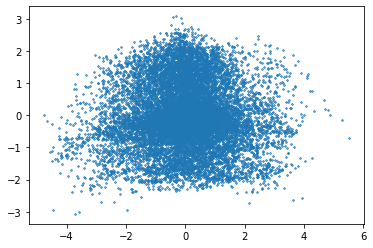

In [207]:
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=.7, marker='x', s=3)

## Prediction errors

In [117]:
def normal(x, m, s):
    return np.exp(-(x - m)**2/(2*s*s))/np.sqrt(2*np.pi*s*s)

def err_hist(feature: str):
    fig = plt.figure(figsize=(14, 7))
    diff = df[feature] - df[feature + '_nwp']
    plt.subplot(1, 2, 1)
    plt.scatter(df[feature], diff, alpha=.6, marker='x', s=3)
    plt.xlabel('True value (observation)')
    plt.ylabel('Error')
    plt.subplot(1, 2, 2)
    val, key, _ = plt.hist(diff, bins=100, density=True, label='Error distribution', orientation='horizontal')
    key = .5*(key[1:] + key[:-1])
    opt, _ = curve_fit(normal, key, val)
    m, s = opt[0], opt[1]
    maxi = val.max()
    plt.plot([0, maxi], [m, m], '--', color='tab:red', label='Gaussain mean: {:.2f}'.format(m))
    plt.plot(normal(key, opt[0], opt[1]), key, color='tab:red', label='Gaussian fit')
    plt.legend()
    fig.tight_layout()

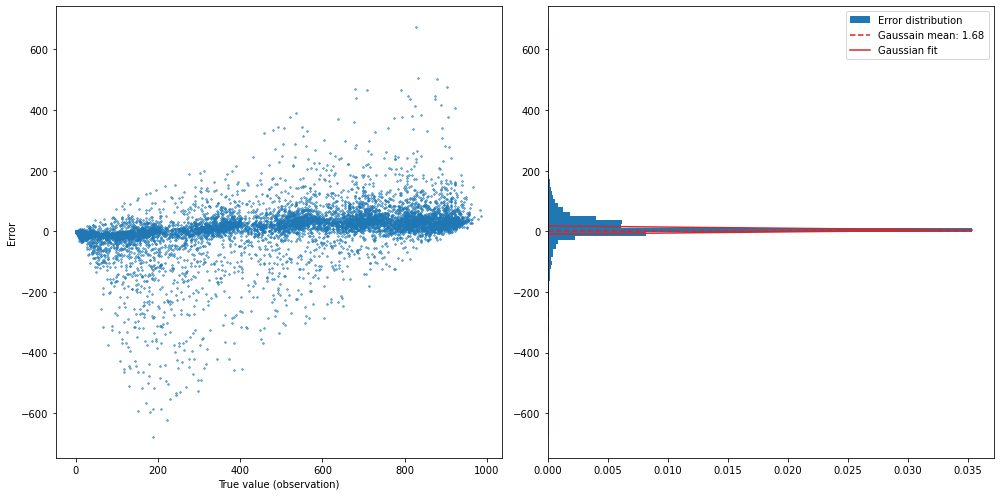

In [118]:
err_hist('ghi')

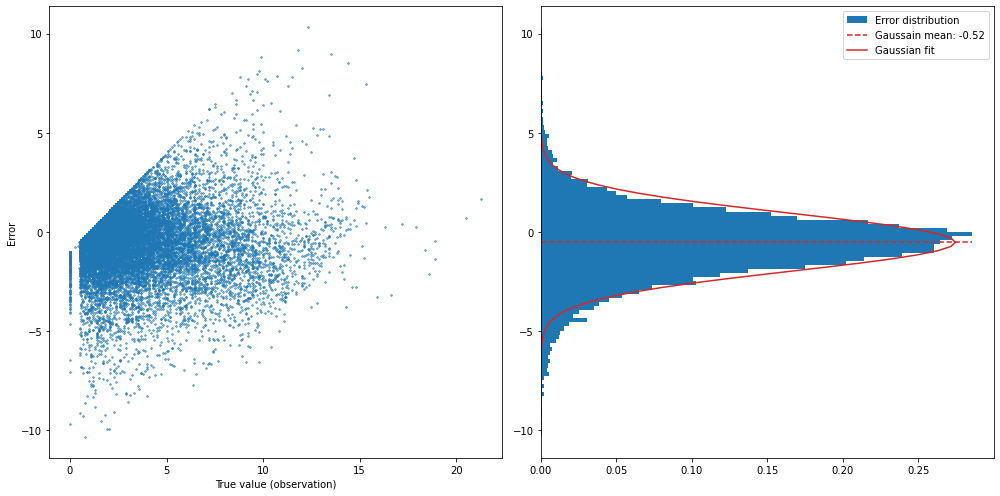

In [119]:
err_hist('ws')

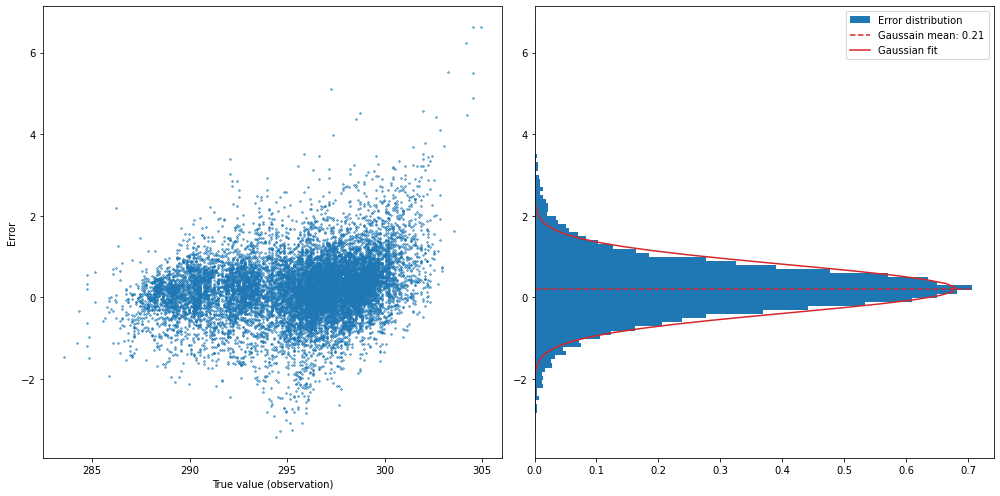

In [120]:
err_hist('T')

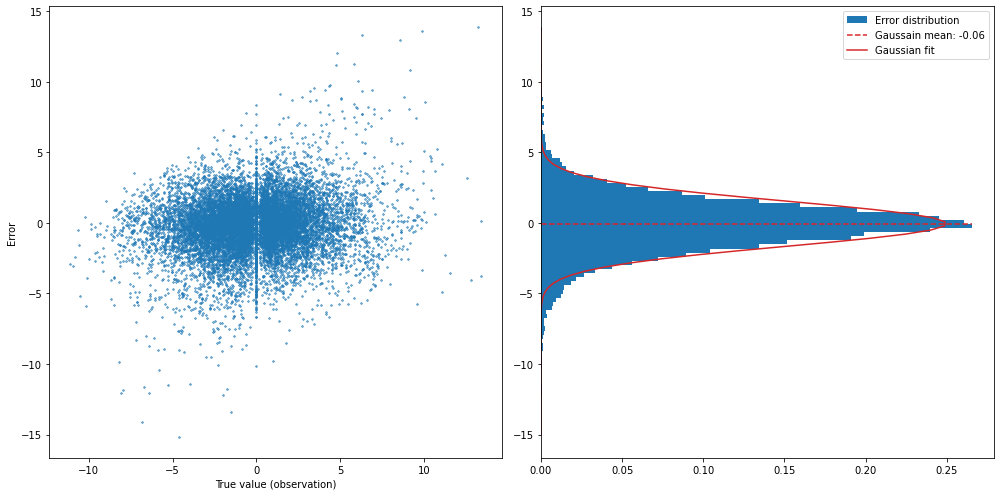

In [121]:
err_hist('wx')

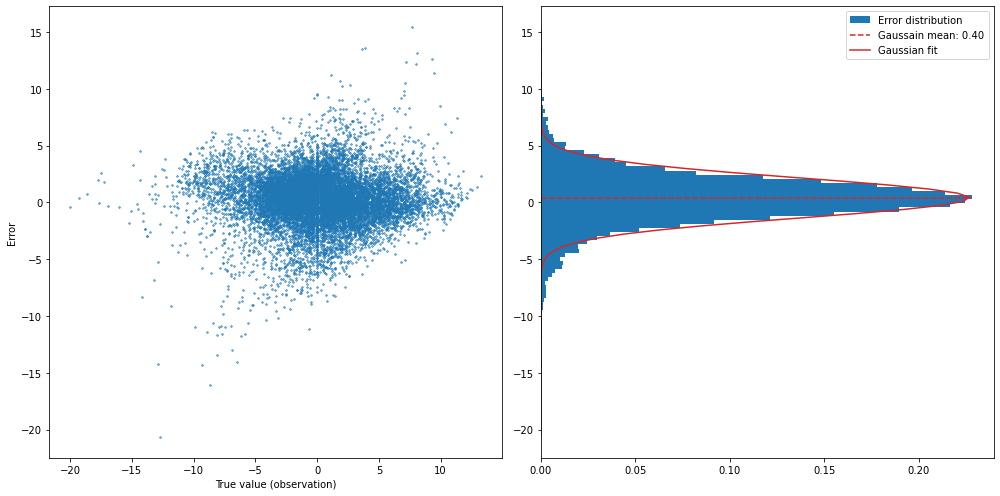

In [122]:
err_hist('wy')

In [216]:
err = np.array(df[['ghi', 'ws', 'T', 'wd']]) - np.array(df[[x + '_nwp' for x in ['ghi', 'ws', 'T', 'wd']]])
err -= err.mean(axis=0)
err /= err.std(axis=0)
err_pca = PCA(n_components=2, svd_solver='full')
err_new = err_pca.fit_transform(err)
err_pca.explained_variance_ratio_

array([0.29403567, 0.25374884])

In [217]:
np.sqrt(np.power(err - pca.inverse_transform(err_new), 2).mean(axis=0))

array([1.71999753, 0.9693149 , 0.7405647 , 1.56045276])

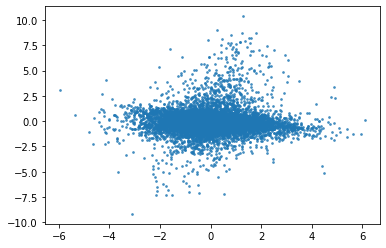

In [218]:
plt.scatter(err_new[:, 0], err_new[:, 1], alpha=.7, s=3)

In [221]:
((err.T@err)/err.shape[0])**2

array([[1.00000000e+00, 2.54843017e-04, 2.59361016e-03, 1.06292806e-04],
       [2.54843017e-04, 1.00000000e+00, 1.27071254e-02, 6.78781920e-03],
       [2.59361016e-03, 1.27071254e-02, 1.00000000e+00, 3.67664732e-03],
       [1.06292806e-04, 6.78781920e-03, 3.67664732e-03, 1.00000000e+00]])